In [1]:
print((9/(1 - (0.008/0.01))))

45.00000000000001


In [14]:
import math

def E(u ,v):
    return (u*math.exp(v) - 2*v*(math.exp(-u)))**2

def dEdu(u,v):
    return ((2)*(math.exp(v) + 2*v*math.exp(-u))*(u*math.exp(v) -2*v*math.exp(-u)))

def dEdv(u,v):
    return ((2)*(u*math.exp(v) -2*v*math.exp(-u))*(u*math.exp(v) - 2*math.exp(-u)))


def gradient_descent(u, v, desired_error, gamma):
    iterations = 0
    cur_error = E(u,v)
    while cur_error > desired_error:
        du = dEdu(u,v)
        dv = dEdv(u,v)
        u = u - gamma*du
        v = v - gamma*dv
        cur_error = E(u, v)
        iterations += 1
    else:
        return (u, v, iterations)

u, v, i = gradient_descent(1,1,10**(-14), 0.1)
print(i)
print('a: ', math.dist([u,v], [1.000, 1.000]))
print('b: ', math.dist([u,v], [0.713, 0.045]))
print('c: ', math.dist([u,v], [0.016, 0.112]))
print('d: ', math.dist([u,v], [-0.083, 0.029]))
print('e: ', math.dist([u,v], [0.045, 0.024]))



10
a:  1.3657178869246722
b:  0.6685948857743971
c:  0.0926123232021653
d:  0.12783573228217807
e:  0.0002669218610597792


In [15]:
def coordinate_descent(u, v, max_iter, gamma):
    iterations = 0
    cur_error = E(u,v)
    while max_iter > iterations:
        du = dEdu(u,v)
        u = u - gamma*du
        dv = dEdv(u,v)
        v = v - gamma*dv
        cur_error = E(u, v)
        iterations += 1
    else:
        return (cur_error)

error = coordinate_descent(1,1,15, 0.1)
print(error)




0.13981379199615315


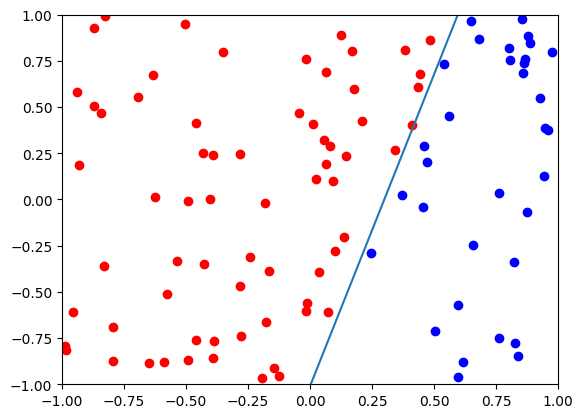

In [28]:
import numpy as np
import random as rand

def generate_target():
    p1 = [random.uniform(-1,1), random.uniform(-1,1)]
    p2 = [random.uniform(-1,1), random.uniform(-1,1)]
    m = (p2[1] - p1[1])/(p2[0] - p1[0])
    b = p2[1] - m*p2[0]
    return [m,b]

N = 100
def classify_point(point, target):
    if target[0]*point[0] + target[1] < point[1]:
        return '+1'
    else:
        return '-1'
    
def generate_dataset(N, target):
    dataset = []
    for i in range(N):
        point = [random.uniform(-1,1), random.uniform(-1,1)]
        y = classify_point(point, target)
        point.append(y)
        dataset.append(point)
    return dataset

f = generate_target()
dataset = generate_dataset(N, f)
xred = []
yred = []
xblue = []
yblue = []
for p in dataset:
    if p[2][0] == '+':
        xred.append(p[0])
        yred.append(p[1])
    else:
        xblue.append(p[0])
        yblue.append(p[1])

from matplotlib import pyplot as plt
plt.scatter(xred,yred,color='red')
plt.scatter(xblue,yblue,color='blue')
plt.axline((-1, -f[0] + f[1]), (1, f[0] + f[1]))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.show()

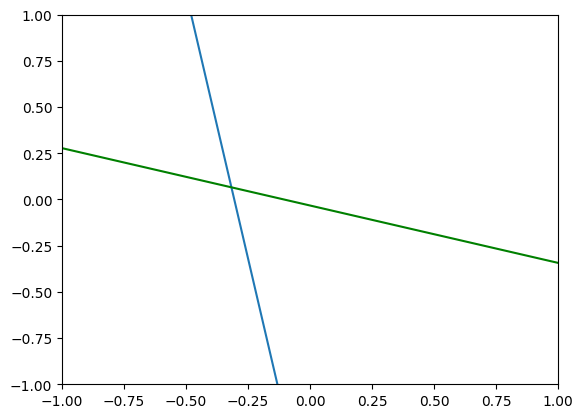

E_out average: 0.10582797244027478
Epochs taken average: 343.26


In [54]:
def gradient(p, w):
    x = [1, p[0], p[1], int(p[2])]
    sum_e = [0, 0, 0]
    
    temp_sum = [x[3] * x[0], x[3] * x[1], x[3] * x[2]]
    for t in range(3):
        temp_sum[t] /= -1 * (1 + math.exp(-1 * (x[3] * (x[0] * w[0] + x[1] * w[1] + x[2] * w[2]))))
        sum_e[t] += temp_sum[t]

    return sum_e


epoch = 0
e_count = 0
gamma = 0.01
num_experiments = 100
num_test_points = 500
for i in range(num_experiments):
    f = generate_target()
    dataset = generate_dataset(N, f)
    
    w = [0, 0, 0]
    wb = [10, 10, 10]
    
    while(math.sqrt((wb[0] - w[0])**2 + (wb[1] - w[1])**2 + (wb[2]-w[2])**2) > 0.01):
        wb = w[:]
        random.shuffle(dataset)
        for j in range(N):
            e_in_sample = gradient(dataset[j], w)
            for k in range(3):
                e_in_sample[k] *= gamma
                w[k] += e_in_sample[k]
        epoch += 1
    
    dataset_error = generate_dataset(num_test_points, f)
    misclassified = 0
    
    for point_idx in range(num_test_points):
        misclassified += math.log(1 + math.exp(int(dataset_error[point_idx][2]) *  
                        (w[0] + w[1] * dataset_error[point_idx][0] + w[2] * dataset_error[point_idx][1])))
    
    e_count += misclassified/num_test_points
        


print("E_out average: " + str(e_count/num_experiments))
print("Epochs taken average: " + str(epoch/num_experiments))

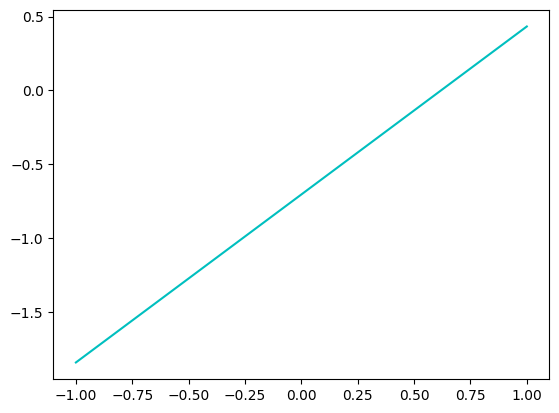